<a href="https://colab.research.google.com/github/rouchi-11/Image_Processing/blob/main/Assignment_2/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless matplotlib --quiet


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cutu.jpg to cutu (1).jpg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

# Load the uploaded image
for fn in uploaded:
    path = fn

In [ ]:
# Convert to grayscale
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

Original histogram

/tmp/ipython-input-1050486207.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(), 256, [0, 256])


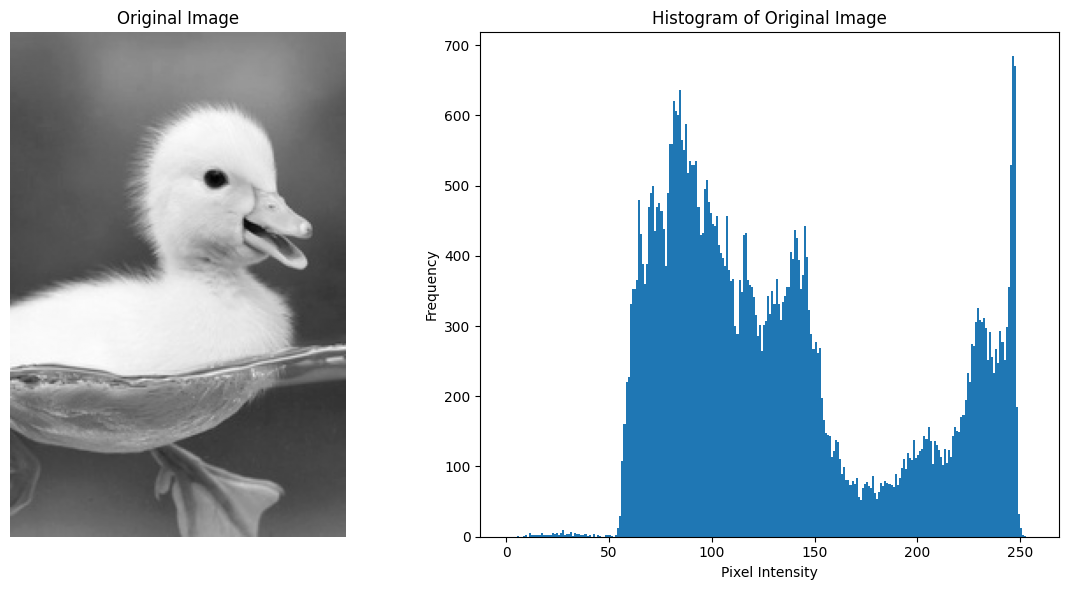

In [ ]:
#original histogram
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(img.ravel(), 256, [0, 256])
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

Histogram Equalization

/tmp/ipython-input-479709143.py:11: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equalized.ravel(), 256, [0, 256])


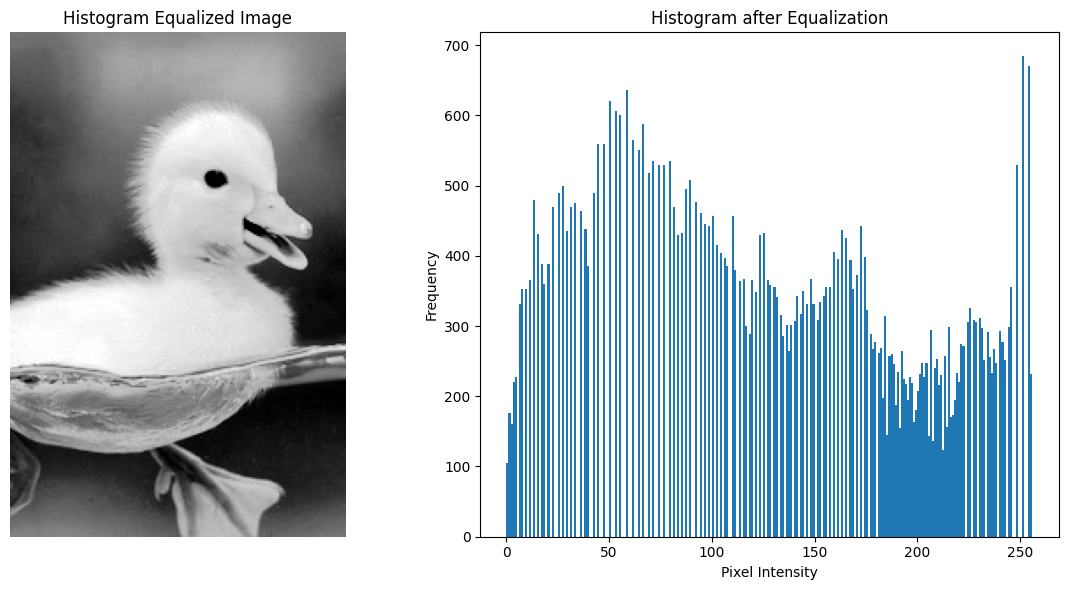

In [ ]:
#Histogram equalization
equalized = cv2.equalizeHist(img)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalized Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(equalized.ravel(), 256, [0, 256])
plt.title("Histogram after Equalization")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

 Spatial Domain Filters

In [ ]:
#Mean filters
mean_kernel = np.ones((5, 5), np.float32) / 25
smoothed = cv2.filter2D(img, -1, mean_kernel)


In [ ]:
#Sharpening filters
sharpen_kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
sharpened = cv2.filter2D(img, -1, sharpen_kernel)

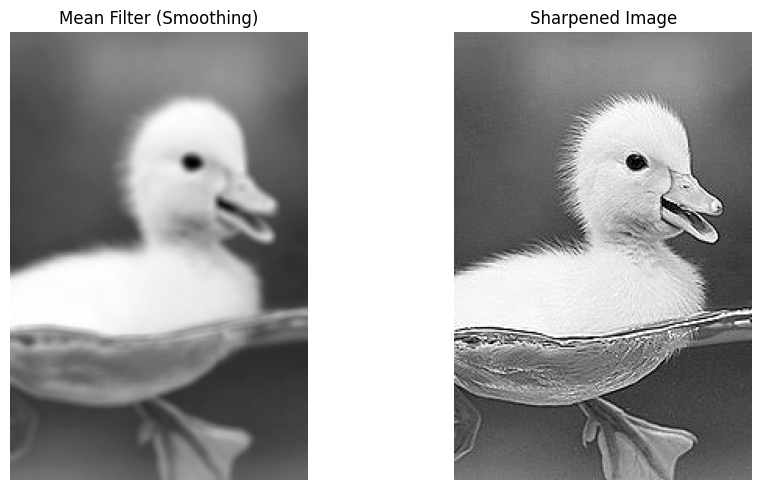

In [ ]:
#Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(smoothed, cmap='gray')
plt.title("Mean Filter (Smoothing)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened, cmap='gray')
plt.title("Sharpened Image")
plt.axis('off')
plt.tight_layout()
plt.show()


Frequency Domain Filters

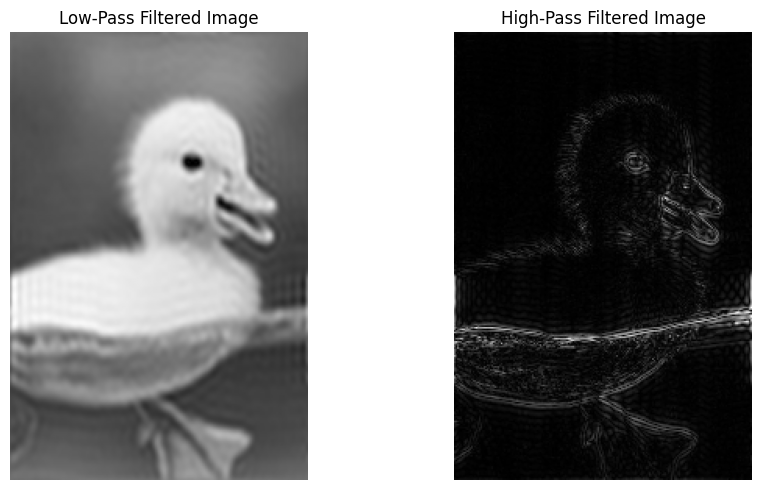

In [ ]:
def frequency_filter(img, mode='low'):
    dft = np.fft.fft2(img)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    mask = np.zeros((rows, cols), np.uint8)
    r = 30  # radius

    if mode == 'low':
        mask[crow - r:crow + r, ccol - r:ccol + r] = 1
    elif mode == 'high':
        mask = np.ones((rows, cols), np.uint8)
        mask[crow - r:crow + r, ccol - r:ccol + r] = 0

    filtered = dft_shift * mask
    f_ishift = np.fft.ifftshift(filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back
# Apply both
low_pass = frequency_filter(img, mode='low')
high_pass = frequency_filter(img, mode='high')

# Show results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(low_pass, cmap='gray')
plt.title("Low-Pass Filtered Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(high_pass, cmap='gray')
plt.title("High-Pass Filtered Image")
plt.axis('off')
plt.tight_layout()
plt.show()